# Análisis Exploratorio de Datos

## Datasets:
- dataset 1: Catálogo de hospitales en España.
- dataset 2: Equipo médico por comunidad autónoma.
- dataset 3: Gasto en sanidad por comunidad autónoma.
- dataset 4: Población y superficie de cada CCAA.
- dataset 5: Defuncioness por tipo y CCAA.
- dataset 6: PIB per Capita por CCAA.

## Máquinas médicas:
- **TAC**:Tomografía Axial Computerizada
- **RM**: Resonancia Magnética
- **GAM**: Gammacámara
- **HEM**: Sala de Hemodinámica
- **ASD**: Angiografía por Sustracción Digital
- **LIT**: Litotricia Extracorporea por Ondas de Choque
- **BCO**: Bomba de Cobalto
- **ALI**: Acelerador de Partículas
- **SPECT**: Tomografía por emisión de fotones
- **PET**: Tomografía por emisión de positrones
- **MAMOS**: Mamógrafo
- **DO**: Densitómetros Óseos
- **DIAL**: Equipos de Hemodiálisis
- Cataluña: Los datos de gammacámara incluyen SPECT

## Páginas importantes:
Las páginas incluidas a continuación son las fuentes de información necesarias en la creación de los datasets 3 y 4.

- [url_datos_hospitales](https://www.mscbs.gob.es/ciudadanos/centrosCA.do)
- [url_gasto_sanidad](https://www.mscbs.gob.es/estadEstudios/estadisticas/inforRecopilaciones/docs/presupuestosIniciales.pdf)
- [url_población](https://es.wikipedia.org/wiki/Anexo:Comunidades_y_ciudades_aut%C3%B3nomas_de_Espa%C3%B1a)

## 1. Importamos las librerias necesarias

In [2]:
import folium
import geocoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from folium import plugins

## 2. Cargamos los datos y creamos los datasets finales

In [3]:
catalogo_hospitales = pd.read_csv('./data/Catalogo_de_Hospitales.csv')
catalogo_hospitales.head()

,Código CCN,Código CNH,Nombre,Comunidad Autónoma,Provincia,Municipio,Dirección,Código Postal,Teléfono,Número de camas instaladas,Tipo de Centro,Dependencia Funcional,Observaciones,Concierto,Acreditación Docente
0,104000314,40059,HOSPITAL VIRGEN DEL MAR,ANDALUCÍA,ALMERÍA,Almería,"CARRETERA DEL MAMI, KM. 1 S/N",4120,950210100,76,Hospitales Generales,PRIVADOS,NaN,Concierto parcial,NO
1,104000316,40010,HOSPITAL UNIVERSITARIO TORRECARDENAS,ANDALUCÍA,ALMERÍA,Almería,CALLE PARAJE TORRECARDENAS S/N,4009,950016114,635,Hospitales Generales,SERVICIOS E INSTITUTOS DE SALUD DE LAS COMUNID...,NaN,Sin concierto.,NO
2,104000319,40031,HOSPITAL DE LA CRUZ ROJA DE ALMERIA,ANDALUCÍA,ALMERÍA,Almería,CARRETERA DE RONDA S/N,4009,950017400,69,Hospitales Generales,SERVICIOS E INSTITUTOS DE SALUD DE LAS COMUNID...,NaN,Sin concierto.,NO
3,104000320,40084,HOSPITAL LA INMACULADA,ANDALUCÍA,ALMERÍA,Huércal-Overa,AVENIDA DOCTORA ANA PARRA S/N,4600,950029176,184,Hospitales Generales,SERVICIOS E INSTITUTOS DE SALUD DE LAS COMUNID...,NaN,Sin concierto,SI
4,104000321,40118,HOSPITAL DE PONIENTE,ANDALUCÍA,ALMERÍA,"Ejido, El",CARRETERA ALMERIMAR S/N,4700,950022500,261,Hospitales Generales,SERVICIOS E INSTITUTOS DE SALUD DE LAS COMUNID...,NaN,Sin concierto,SI


In [4]:
equipo_medico = pd.read_csv('./data/Equipo_Médico.csv', sep='\t')
equipo_medico.head()

,Comunidad Autónoma,TAC,RM,GAM,HEM,ASD,LIT,BCO,ALI,SPECT,PET,MAMOS,DO,DIAL
0,ANDALUCÍA,143,77,31,53,44,15,0,37,12,8,91,38,689
1,ARAGÓN,24,23,1,8,7,3,0,6,4,2,23,4,231
2,PPDO. DE ASTURIAS,19,17,4,4,4,3,0,8,4,3,19,7,168
3,ILLES BALEARS,23,25,5,9,7,4,0,4,3,2,23,12,191
4,CANARIAS,38,32,13,14,17,7,0,14,13,3,30,15,332


In [5]:
gasto_sanidad = pd.read_csv('./data/gasto_sanidad_CCAA.csv', sep=';')
gasto_sanidad.head()

,Comunidad Autónoma,Gasto_sanidad_2021(miles_euros)
0,ANDALUCÍA,11759292
1,ARAGÓN,2328735
2,PPDO. DE ASTURIAS,1968939
3,CANTABRIA,996633
4,CEUTA,7566


In [14]:
poblacion_ccaa = pd.read_csv('./data/poblacion_CCAA.csv', sep=';')
poblacion_ccaa.head()

,Comunidad Autónoma,Población,Superficie
0,ANDALUCÍA,8464411,87599
1,ARAGÓN,1329391,47720
2,ASTURIAS,1018784,10604
3,CANTABRIA,582905,5321
4,CEUTA,84202,20


In [17]:
defunciones_tipo_ccaa = pd.read_csv('./data/defunciones_CCAA_tipo.csv', sep=';')
defunciones_tipo_ccaa.head()

,Causa de muerte,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
0,001-102 I-XXII.Todas las causas,Total,Nacional,Todas las edades,2019,418.703
1,001-102 I-XXII.Todas las causas,Total,Nacional,Todas las edades,2018,427.721
2,001-102 I-XXII.Todas las causas,Total,Nacional,Todas las edades,2017,424.523
3,001-102 I-XXII.Todas las causas,Total,Nacional,Todas las edades,2016,410.611
4,001-102 I-XXII.Todas las causas,Total,Nacional,Todas las edades,2015,422.568


In [7]:
defunciones_tipo_cca = pd.read_csv('./data/defunciones_tipo_ccaa.csv')
defunciones_tipo_cca.head()

,Causa de muerte,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
0,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2019,1.130
1,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2018,1.176
2,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2017,1.245
3,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2016,1.288
4,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2015,1.450


In [8]:
pib_capita_ccaa = pd.read_csv('./data/pib_per_capita_ccaa.csv', sep=';')
pib_capita_ccaa.head()

,Comunidad Autónoma,PIB_per_capita
0,MADRID,35.913
1,PAÍS VASCO,34.142
2,C FORAL DE NAVARRA,32.141
3,CATALUÑA,31.119
4,ARAGÓN,28.727


## 3. Creamos tablas y variables nuevas para poder realizar los gráficos

### Dataframe con los 11 hospitales con mayor número de camas en España.

- Posibles gráficos:
    - Lollipop
    - Mapa buscando con geocoder los nombres de los hospitales

In [8]:
data = catalogo_hospitales.groupby('Nombre')['Número de camas instaladas'].sum()
data = pd.DataFrame(data)
hospitales_con_mas_camas = data.sort_values(by='Número de camas instaladas', ascending= False)
hospitales_con_mas_camas = hospitales_con_mas_camas[:11]
hospitales_con_mas_camas

,Número de camas instaladas
Nombre,
COMPLEXO HOSPITALARIO UNIVERSITARIO DE SANTIAGO,1395
COMPLEXO HOSPITALARIO UNIVERSITARIO A CORUÑA,1341
HOSPITAL UNIVERSITARI VALL D'HEBRON,1315
COMPLEXO HOSPITALARIO UNIVERSITARIO DE VIGO,1273
HOSPITAL GENERAL UNIVERSITARIO GREGORIO MARAÑON,1253
HOSPITAL UNIVERSITARIO MIGUEL SERVET,1213
HOSPITAL UNIVERSITARIO 12 DE OCTUBRE,1196
COMPLEJO HOSPITALARIO DE NAVARRA,1077
PARC SANITARI SANT JOAN DE DEU - RECINTE SANT BOI.,1065


### Dataframe con la cantidad de máquinas, número de camas y gasto sanitario por comunidad autónoma.

In [9]:
camas_por_ccaa = pd.DataFrame(catalogo_hospitales.groupby('Comunidad Autónoma')['Número de camas instaladas'].sum())
camas_y_maquinas = camas_por_ccaa.merge(equipo_medico, on='Comunidad Autónoma', how='inner')
camas_y_maquinas.head()

,Comunidad Autónoma,Número de camas instaladas,TAC,RM,GAM,HEM,ASD,LIT,BCO,ALI,SPECT,PET,MAMOS,DO,DIAL
0,ANDALUCÍA,21350,143,77,31,53,44,15,0,37,12,8,91,38,689
1,ARAGÓN,5290,24,23,1,8,7,3,0,6,4,2,23,4,231
2,C. FORAL DE NAVARRA,2331,15,10,0,3,2,2,0,6,4,2,8,3,111
3,CANARIAS,6828,38,32,13,14,17,7,0,14,13,3,30,15,332
4,CANTABRIA,1682,9,6,0,2,4,1,0,4,3,1,5,1,16


In [10]:
camas_maquinas_gasto = camas_y_maquinas.merge(gasto_sanidad, on='Comunidad Autónoma', how='inner')
camas_maquinas_gasto

,Comunidad Autónoma,Número de camas instaladas,TAC,RM,GAM,HEM,ASD,LIT,BCO,ALI,SPECT,PET,MAMOS,DO,DIAL,Gasto_sanidad_2021(miles_euros)
0,ANDALUCÍA,21350,143,77,31,53,44,15,0,37,12,8,91,38,689,11759292
1,ARAGÓN,5290,24,23,1,8,7,3,0,6,4,2,23,4,231,2328735
2,C. FORAL DE NAVARRA,2331,15,10,0,3,2,2,0,6,4,2,8,3,111,1253822
3,CANARIAS,6828,38,32,13,14,17,7,0,14,13,3,30,15,332,3308761
4,CANTABRIA,1682,9,6,0,2,4,1,0,4,3,1,5,1,16,996633
5,CASTILLA Y LEÓN,9130,47,31,9,9,8,4,0,13,6,1,41,14,304,4376339
6,CASTILLA-LA MANCHA,5899,39,24,3,8,4,3,0,4,4,1,26,10,111,3715937
7,CATALUÑA,34322,122,106,19,36,52,12,0,36,24,14,105,45,716,9789049
8,CEUTA,252,1,1,0,0,0,0,0,0,0,0,1,1,0,7566
9,COMUNIDAD VALENCIANA,13811,91,68,17,66,38,11,0,26,13,12,57,38,566,7530056


### Dataframe con el número de centros con acreditación académica (universitarios), nombre de los hospitales, población, superficie y densidad de población por comunidad autónoma.

Pasos a seguir:
1. Calcular la densidad de población (dataframe: poblacion_ccaa)
2. Juntar las tablas de 'catalogo_hospitales' y 'poblacion_ccaa'
3. Seleccionar las columnas necesarias ('Nombre','Comunidad Autónoma', 'Acreditación Docente', 'Población', 'Superficie', 'Densidad_poblacion')
4. Seleccionar sólo los centros que tienen acreditación académica

In [11]:
#1. Densidad de población
poblacion_ccaa['Densidad_poblacion'] = poblacion_ccaa['Población'] / poblacion_ccaa['Superficie']
poblacion_ccaa.head()

,Comunidad Autónoma,Población,Superficie,Densidad_poblacion
0,ANDALUCÍA,8464411,87599,96.626799
1,ARAGÓN,1329391,47720,27.858152
2,PPDO. DE ASTURIAS,1018784,10604,96.075443
3,CANTABRIA,582905,5321,109.548017
4,CEUTA,84202,20,4210.100000


In [12]:
#2. Merge de tablas
hospitales_poblacion_ccaa = catalogo_hospitales.merge(poblacion_ccaa, on='Comunidad Autónoma', how='inner')
hospitales_poblacion_ccaa.head()

,Código CCN,Código CNH,Nombre,Comunidad Autónoma,Provincia,Municipio,Dirección,Código Postal,Teléfono,Número de camas instaladas,Tipo de Centro,Dependencia Funcional,Observaciones,Concierto,Acreditación Docente,Población,Superficie,Densidad_poblacion
0,104000314,40059,HOSPITAL VIRGEN DEL MAR,ANDALUCÍA,ALMERÍA,Almería,"CARRETERA DEL MAMI, KM. 1 S/N",4120,950210100,76,Hospitales Generales,PRIVADOS,NaN,Concierto parcial,NO,8464411,87599,96.626799
1,104000316,40010,HOSPITAL UNIVERSITARIO TORRECARDENAS,ANDALUCÍA,ALMERÍA,Almería,CALLE PARAJE TORRECARDENAS S/N,4009,950016114,635,Hospitales Generales,SERVICIOS E INSTITUTOS DE SALUD DE LAS COMUNID...,NaN,Sin concierto.,NO,8464411,87599,96.626799
2,104000319,40031,HOSPITAL DE LA CRUZ ROJA DE ALMERIA,ANDALUCÍA,ALMERÍA,Almería,CARRETERA DE RONDA S/N,4009,950017400,69,Hospitales Generales,SERVICIOS E INSTITUTOS DE SALUD DE LAS COMUNID...,NaN,Sin concierto.,NO,8464411,87599,96.626799
3,104000320,40084,HOSPITAL LA INMACULADA,ANDALUCÍA,ALMERÍA,Huércal-Overa,AVENIDA DOCTORA ANA PARRA S/N,4600,950029176,184,Hospitales Generales,SERVICIOS E INSTITUTOS DE SALUD DE LAS COMUNID...,NaN,Sin concierto,SI,8464411,87599,96.626799
4,104000321,40118,HOSPITAL DE PONIENTE,ANDALUCÍA,ALMERÍA,"Ejido, El",CARRETERA ALMERIMAR S/N,4700,950022500,261,Hospitales Generales,SERVICIOS E INSTITUTOS DE SALUD DE LAS COMUNID...,NaN,Sin concierto,SI,8464411,87599,96.626799


In [13]:
#3. Selección de las columnas necesarias
df_estudiantes = hospitales_poblacion_ccaa[['Nombre',
                                            'Comunidad Autónoma', 
                                            'Acreditación Docente', 
                                            'Población', 
                                            'Superficie', 
                                            'Densidad_poblacion']]
df_estudiantes.head()

,Nombre,Comunidad Autónoma,Acreditación Docente,Población,Superficie,Densidad_poblacion
0,HOSPITAL VIRGEN DEL MAR,ANDALUCÍA,NO,8464411,87599,96.626799
1,HOSPITAL UNIVERSITARIO TORRECARDENAS,ANDALUCÍA,NO,8464411,87599,96.626799
2,HOSPITAL DE LA CRUZ ROJA DE ALMERIA,ANDALUCÍA,NO,8464411,87599,96.626799
3,HOSPITAL LA INMACULADA,ANDALUCÍA,SI,8464411,87599,96.626799
4,HOSPITAL DE PONIENTE,ANDALUCÍA,SI,8464411,87599,96.626799


In [14]:
#4. Selección de centros con acreditación académica
mapa_centros_estudios = df_estudiantes[df_estudiantes['Acreditación Docente'] == 'SI']
mapa_centros_estudios

,Nombre,Comunidad Autónoma,Acreditación Docente,Población,Superficie,Densidad_poblacion
3,HOSPITAL LA INMACULADA,ANDALUCÍA,SI,8464411,87599,96.626799
4,HOSPITAL DE PONIENTE,ANDALUCÍA,SI,8464411,87599,96.626799
6,HOSPITAL DE ALTA RESOLUCION ELTOYO,ANDALUCÍA,SI,8464411,87599,96.626799
11,HOSPITAL PUNTA DE EUROPA,ANDALUCÍA,SI,8464411,87599,96.626799
13,HOSPITAL UNIVERSITARIO DE JEREZ DE LA FRONTERA,ANDALUCÍA,SI,8464411,87599,96.626799
...,...,...,...,...,...,...
806,HOSPITAL UNIVERSITARIO CRUCES,PAÍS VASCO,SI,2220504,7234,306.953829
807,HOSPITAL SAN ELOY,PAÍS VASCO,SI,2220504,7234,306.953829
808,HOSPITAL GALDAKAO-USANSOLO,PAÍS VASCO,SI,2220504,7234,306.953829
829,HOSPITAL UNIVERSITARIO DE CEUTA,CEUTA,SI,84202,20,4210.100000


### Limpieza de datos del dataframe 'defunciones_tipo_ccaa'

Pasos:
1. Escoger los datos de las CCAA
2. Eliminar los números en los nombres de las CCAA
3. Limpiar la columnas de 'causa muerte'
4. Escoger las causas de muertes únicas
5. Cambiar la forma de la columna 'Comunidades y Ciudades Autónomas'

In [18]:
#1. Escoger los datos de las CCAA
mask1 = defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'] != 'Nacional'
mask2 = defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'] != 'Extranjero'

defunciones_tipo_ccaa = defunciones_tipo_ccaa[(mask1) & (mask2)]
defunciones_tipo_ccaa.head()

,Causa de muerte,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
680,001-102 I-XXII.Todas las causas,Total,01 Andalucía,Todas las edades,2019,70.505
681,001-102 I-XXII.Todas las causas,Total,01 Andalucía,Todas las edades,2018,72.806
682,001-102 I-XXII.Todas las causas,Total,01 Andalucía,Todas las edades,2017,71.234
683,001-102 I-XXII.Todas las causas,Total,01 Andalucía,Todas las edades,2016,69.231
684,001-102 I-XXII.Todas las causas,Total,01 Andalucía,Todas las edades,2015,72.001


In [19]:
#2. Eliminar números de las CCAA
ccaa = defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas']

ccaa = ccaa.replace('\d', '', regex=True)
ccaa = ccaa.replace('\s', '', regex=True)

defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'] = ccaa
defunciones_tipo_ccaa.head()

,Causa de muerte,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
680,001-102 I-XXII.Todas las causas,Total,Andalucía,Todas las edades,2019,70.505
681,001-102 I-XXII.Todas las causas,Total,Andalucía,Todas las edades,2018,72.806
682,001-102 I-XXII.Todas las causas,Total,Andalucía,Todas las edades,2017,71.234
683,001-102 I-XXII.Todas las causas,Total,Andalucía,Todas las edades,2016,69.231
684,001-102 I-XXII.Todas las causas,Total,Andalucía,Todas las edades,2015,72.001


In [20]:
#3. Limpiar la columna 'causa muerte'
causas = defunciones_tipo_ccaa['Causa de muerte']

causas = causas.replace('\d', '', regex=True)
causas = causas.replace('-', '', regex=True)

causas = causas.str.extract('(\.[A-Za-z\s]+)', expand = False)
causas = causas.replace('\.','',regex=True)

defunciones_tipo_ccaa['Causa de muerte'] = causas
defunciones_tipo_ccaa.head()

,Causa de muerte,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
680,Todas las causas,Total,Andalucía,Todas las edades,2019,70.505
681,Todas las causas,Total,Andalucía,Todas las edades,2018,72.806
682,Todas las causas,Total,Andalucía,Todas las edades,2017,71.234
683,Todas las causas,Total,Andalucía,Todas las edades,2016,69.231
684,Todas las causas,Total,Andalucía,Todas las edades,2015,72.001


In [21]:
#4. Elegir las causas de las muertes
defunciones_tipo_ccaa = defunciones_tipo_ccaa[defunciones_tipo_ccaa['Causa de muerte'] != 'Todas las causas']
defunciones_tipo_ccaa = defunciones_tipo_ccaa.reset_index(drop=True)
defunciones_tipo_ccaa.head()

,Causa de muerte,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
0,Enfermedades infecciosas y parasitarias,Total,Andalucía,Todas las edades,2019,1.130
1,Enfermedades infecciosas y parasitarias,Total,Andalucía,Todas las edades,2018,1.176
2,Enfermedades infecciosas y parasitarias,Total,Andalucía,Todas las edades,2017,1.245
3,Enfermedades infecciosas y parasitarias,Total,Andalucía,Todas las edades,2016,1.288
4,Enfermedades infecciosas y parasitarias,Total,Andalucía,Todas las edades,2015,1.450


In [23]:
#5.

#Convertimos todas las CCAA a mayúsculas
defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'] = defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'].str.upper()

#Modificación de la columna de CCAA
for i in range(len(defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'])):
    if defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] == 'ASTURIAS,PRINCIPADODE':
        defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] = 'ASTURIAS'
    elif defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] == 'BALEARS,ILLES':
        defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] = 'ILLES BALEARS'
    elif defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] == 'CASTILLAYLEÓN':
        defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] = 'CASTILLA Y LEÓN'
    elif defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] == 'CASTILLA-LAMANCHA':
        defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] = 'CASTILLA-LA MANCHA'
    elif defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] == 'COMUNITATVALENCIANA':
        defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] = 'COMUNIDAD VALENCIANA'
    elif defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] == 'MADRID,COMUNIDADDE':
        defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] = 'MADRID'
    elif defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] == 'MURCIA,REGIÓNDE':
        defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] = 'MURCIA'
    elif defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] == 'NAVARRA,COMUNIDADFORALDE':
        defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] = 'NAVARRA'
    elif defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] == 'PAÍSVASCO':
        defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] = 'PAÍS VASCO'
    elif defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] == 'RIOJA,LA':
        defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] = 'LA RIOJA'
    else:
        pass

<ipython-input-23-70a1bb3c6dfc>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] = 'NAVARRA'
<ipython-input-23-70a1bb3c6dfc>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'][i] = 'PAÍS VASCO'
<ipython-input-23-70a1bb3c6dfc>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defunciones_tipo_ccaa['Comunidades y Ciudade

In [24]:
defunciones_tipo_ccaa.head()

,Causa de muerte,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
0,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2019,1.130
1,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2018,1.176
2,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2017,1.245
3,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2016,1.288
4,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2015,1.450


In [25]:
defunciones_tipo_ccaa.to_csv('./data/defunciones_tipo_ccaa.csv', index=False)

### Modificación de las comunidades autonomas del dataset 'catalogo_de_hospitales'

In [29]:
catalogo_hospitales['Comunidad Autónoma'].unique()

array(['ANDALUCÍA', 'ARAGÓN', 'PPDO. DE ASTURIAS', 'ILLES BALEARS',
       'CANARIAS', 'CANTABRIA', 'CASTILLA Y LEÓN', 'CASTILLA-LA MANCHA',
       'CATALUÑA', 'COMUNIDAD VALENCIANA', 'EXTREMADURA', 'GALICIA',
       'MADRID', 'REGIÓN DE MURCIA', 'C. FORAL DE NAVARRA', 'PAÍS VASCO',
       'LA RIOJA', 'CEUTA', 'MELILLA'], dtype=object)

In [30]:
for i in range(len(catalogo_hospitales['Comunidad Autónoma'])):
    if catalogo_hospitales['Comunidad Autónoma'][i] == 'PPDO. DE ASTURIAS':
        catalogo_hospitales['Comunidad Autónoma'][i] = 'ASTURIAS'
    if catalogo_hospitales['Comunidad Autónoma'][i] == 'REGIÓN DE MURCIA':
        catalogo_hospitales['Comunidad Autónoma'][i] = 'MURCIA'
    if catalogo_hospitales['Comunidad Autónoma'][i] == 'C. FORAL DE NAVARRA':
        catalogo_hospitales['Comunidad Autónoma'][i] = 'NAVARRA'
    else:
        pass

<ipython-input-30-45a1cf344afb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalogo_hospitales['Comunidad Autónoma'][i] = 'ASTURIAS'
<ipython-input-30-45a1cf344afb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalogo_hospitales['Comunidad Autónoma'][i] = 'MURCIA'
<ipython-input-30-45a1cf344afb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalogo_hospitales['Comunidad Autónoma'][i] = 'NAVARRA'


In [32]:
catalogo_hospitales.to_csv('catalogo_hospitales.csv', index=False)

## 4. Gráficas

### Correlación de los datos del dataset 'catalogo_hospitales'

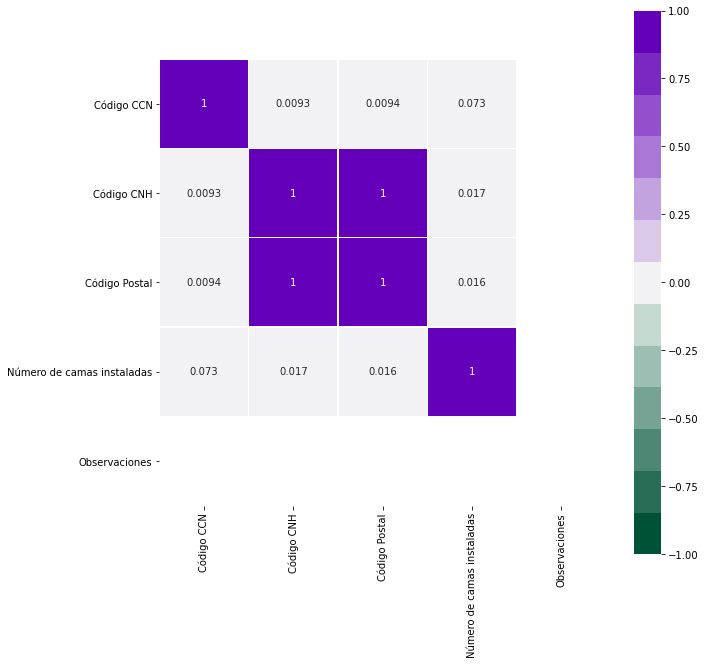

In [15]:
#No usar

plt.figure(figsize=(10,10))
sns.heatmap(catalogo_hospitales.corr(),
           vmin = -1,
           vmax = 1,
           annot = True,
           square = True,
           linewidth = .5,
           cmap=sns.diverging_palette(150, 277, s=100, l=30, n=13));

### Gráfico de barras con número de camas por tipo de Dependencial Funcional (centros privados, públicos...)

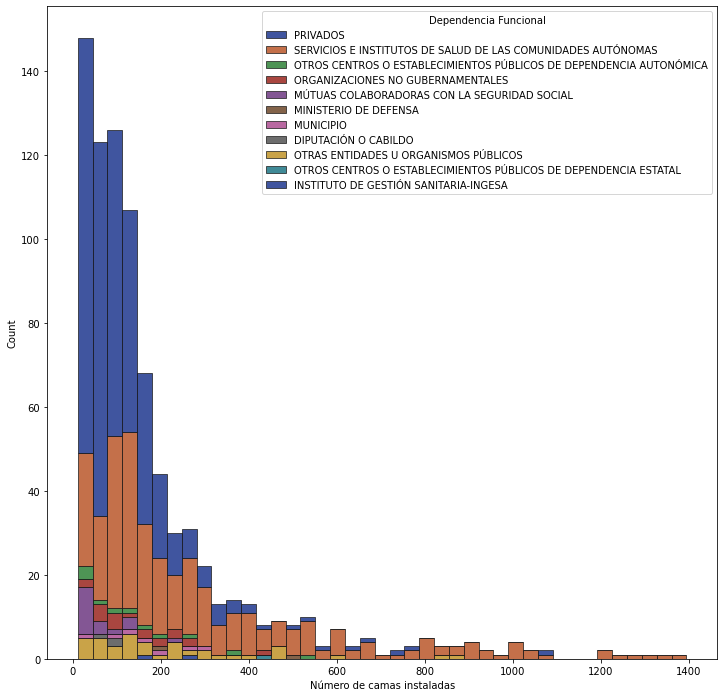

In [16]:
#No usar, no se entiende, ver si se puede mejorar

plt.figure(figsize=(12,12)) #Cambiar
sns.histplot(data = catalogo_hospitales,
        x = 'Número de camas instaladas',
        multiple = 'stack',
        hue = 'Dependencia Funcional',
        palette='dark',
        edgecolor="0.1",
        linewidth=.7);

### Gráfico Lollipop para visualizar las hospitales con mayor número de camas

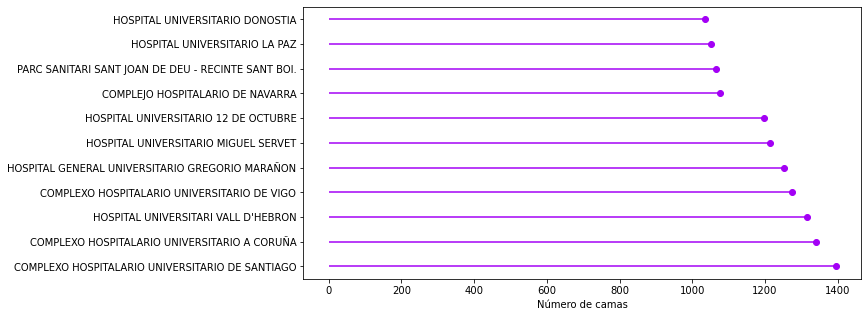

In [17]:
#Utilizar

plt.figure(figsize=(10,5))
plt.hlines(y=hospitales_con_mas_camas['Número de camas instaladas'].index,
           xmin=0,
           xmax=hospitales_con_mas_camas['Número de camas instaladas'],
           color='#A300F5')

plt.plot(hospitales_con_mas_camas['Número de camas instaladas'],
         hospitales_con_mas_camas['Número de camas instaladas'].index,
         "o",
         color='#A300F5')

plt.xlabel('Número de camas');

### Mapa con los hospitales con mayor número de camas

Pasos:
1. Buscamos las coordenadas de los distintos hospitales por nombre
2. Como podemos comprobar nos faltan algunos, esto se debe a que el nombre varia de los datos al mapa
3. Rellenamos los vacíos de la lista con los nombres correctos
4. Creamos el mapa con la lista ya completa

In [21]:
#1. Buscamos las coordenadas de los distintos hospitales por nombre

lista_sitios = []
for i in hospitales_con_mas_camas.index:
    g = geocoder.osm(i)
    lista_sitios.append(g.latlng)

In [22]:
#2. Como podemos comprobar nos faltan algunos, esto se debe a que el nombre varia de los datos al mapa

lista_sitios

[[42.86988465, -8.56585229973772],
 [43.34426335, -8.38914622033265],
 None,
 None,
 [40.419688449999995, -3.6711262290170836],
 [41.63455725, -0.8997979456424298],
 [40.376679499999995, -3.6988633268413382],
 [42.805091399999995, -1.6685624933271659],
 None,
 [40.48144225, -3.6872531870474865],
 None]

In [23]:
#3. Rellenamos los vacíos de la lista con los nombres correctos

lista_sitios[2] = geocoder.osm('HOSPITAL GENERAL VALL D\'HEBRON').latlng
lista_sitios[3] = geocoder.osm('HOSPITAL ÁLVARO CUNQUEIRO').latlng
lista_sitios[8] = geocoder.osm('PARC SANITARI SANT JOAN DE DÉU').latlng
lista_sitios[10] = geocoder.osm('DONOSTIA UNIBERTSITATE OSPITALEA').latlng

In [24]:
#4. Creamos el mapa con la lista ya completa

mapa_hospitales_mas_camas = folium.Map(location=[40, -2], zoom_start=6)

for i in range(len(lista_sitios)):
    folium.Marker(location=lista_sitios[i]).add_to(mapa_hospitales_mas_camas)
    
mapa_hospitales_mas_camas

### Gráfico con la correlación de los datos del dataset 'camas_maquinas_gasto'

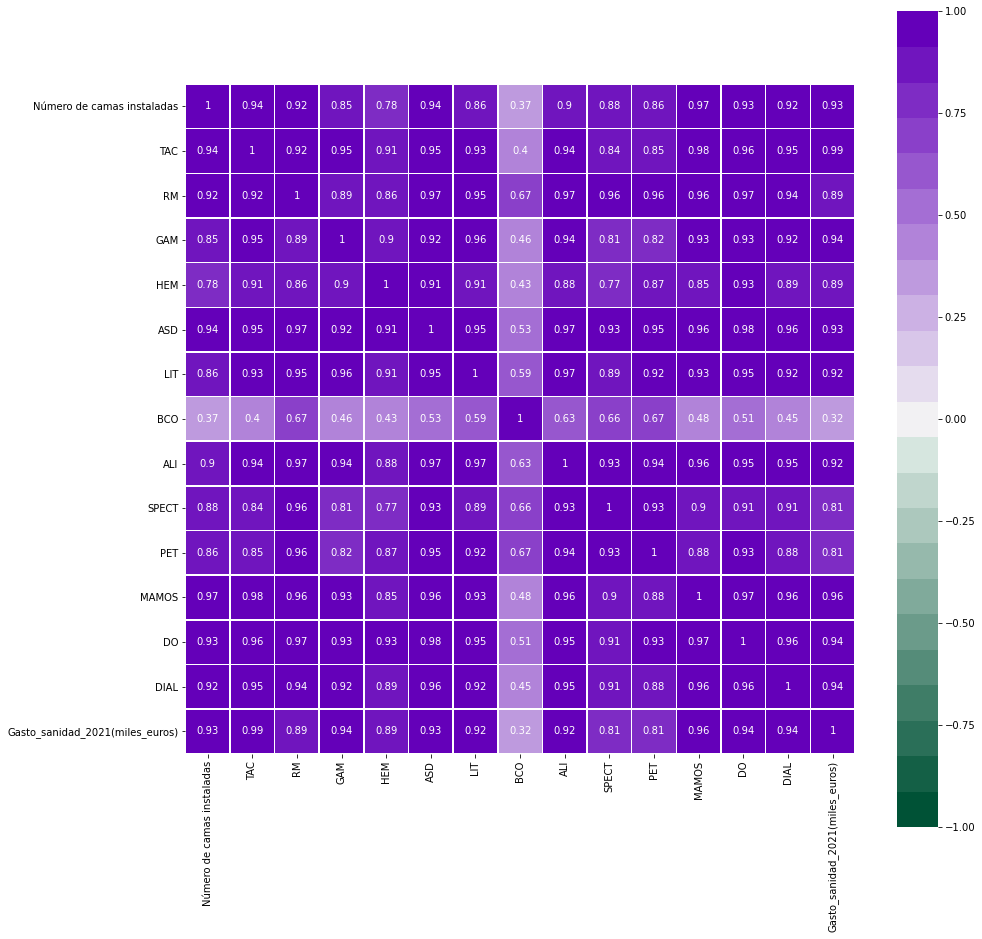

In [18]:
plt.figure(figsize=(15,15)) #Sin interes
sns.heatmap(camas_maquinas_gasto.corr(),
           vmin = -1,
           vmax = 1,
           annot = True,
           square = True,
           linewidth = .5,
           cmap=sns.diverging_palette(150, 277, s=100, l=30, n=23));

## 5. Teorias a demostrar

1. Cuanto más dinero tiene un hospital más máquinas puede comprar
2. Madrid es la CCAA con el mayor de número de hospitales que tienen una gran cantidad de camas
3. Extremadura es una de las CCAA con menos recursos de España
4. No hay suficientes hospitales universitarios para la gente que estudia medicina, enfermería, auxiliar...

Las teorías se pueden variar según se vayan viendo los casos

# 6.Pruebas 

In [32]:
defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'] = defunciones_tipo_ccaa['Comunidades y Ciudades Autónomas'].str.upper()
defunciones_tipo_ccaa.head()

,Causa de muerte,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
0,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2019,1.130
1,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2018,1.176
2,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2017,1.245
3,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2016,1.288
4,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2015,1.450


In [18]:
equipo_medico.head()

,Comunidad Autónoma,TAC,RM,GAM,HEM,ASD,LIT,BCO,ALI,SPECT,PET,MAMOS,DO,DIAL
0,ANDALUCÍA,143,77,31,53,44,15,0,37,12,8,91,38,689
1,ARAGÓN,24,23,1,8,7,3,0,6,4,2,23,4,231
2,PPDO. DE ASTURIAS,19,17,4,4,4,3,0,8,4,3,19,7,168
3,ILLES BALEARS,23,25,5,9,7,4,0,4,3,2,23,12,191
4,CANARIAS,38,32,13,14,17,7,0,14,13,3,30,15,332


In [59]:
prueba = equipo_medico.merge(defunciones_tipo_ccaa, left_on='Comunidad Autónoma', right_on='Comunidades y Ciudades Autónomas', how='inner')
prueba.head()

,Comunidad Autónoma,TAC,RM,GAM,HEM,ASD,LIT,BCO,ALI,SPECT,PET,MAMOS,DO,DIAL,Causa de muerte,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
0,ANDALUCÍA,143,77,31,53,44,15,0,37,12,8,91,38,689,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2019,1.130
1,ANDALUCÍA,143,77,31,53,44,15,0,37,12,8,91,38,689,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2018,1.176
2,ANDALUCÍA,143,77,31,53,44,15,0,37,12,8,91,38,689,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2017,1.245
3,ANDALUCÍA,143,77,31,53,44,15,0,37,12,8,91,38,689,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2016,1.288
4,ANDALUCÍA,143,77,31,53,44,15,0,37,12,8,91,38,689,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2015,1.450


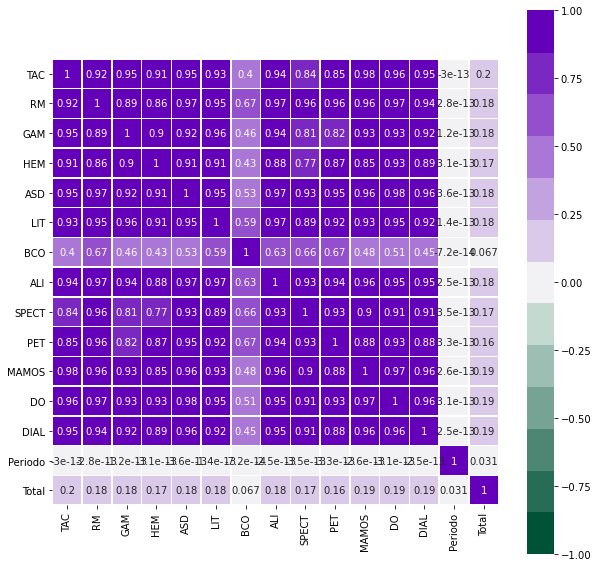

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(prueba.corr(),
           vmin = -1,
           vmax = 1,
           annot = True,
           square = True,
           linewidth = .5,
           cmap=sns.diverging_palette(150, 277, s=100, l=30, n=13));

In [81]:
prueba_2 = prueba.merge(gasto_sanidad, how='inner')
prueba.head()

,Comunidad Autónoma,TAC,RM,GAM,HEM,ASD,LIT,BCO,ALI,SPECT,PET,MAMOS,DO,DIAL,Causa de muerte,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
0,ANDALUCÍA,143,77,31,53,44,15,0,37,12,8,91,38,689,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2019,1.130
1,ANDALUCÍA,143,77,31,53,44,15,0,37,12,8,91,38,689,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2018,1.176
2,ANDALUCÍA,143,77,31,53,44,15,0,37,12,8,91,38,689,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2017,1.245
3,ANDALUCÍA,143,77,31,53,44,15,0,37,12,8,91,38,689,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2016,1.288
4,ANDALUCÍA,143,77,31,53,44,15,0,37,12,8,91,38,689,Enfermedades infecciosas y parasitarias,Total,ANDALUCÍA,Todas las edades,2015,1.450


In [83]:
#Media de muertes por año
d = prueba_2.groupby('Periodo')['Total'].mean()
d

Periodo
1980    35.226006
1981    35.399681
1982    34.861227
1983    35.292662
1984    35.474537
1985    36.356721
1986    35.886335
1987    36.257176
1988    36.870804
1989    37.688630
1990    38.649926
1991    38.810059
1992    38.241257
1993    38.869324
1994    38.682175
1995    39.601599
1996    39.835807
1997    39.732766
1998    40.628379
1999    41.742789
2000    41.314838
2001    41.106837
2002    41.954219
2003    43.666079
2004    42.554546
2005    43.733662
2006    42.533945
2007    43.863246
2008    43.540483
2009    43.633029
2010    42.981225
2011    43.228362
2012    44.587741
2013    43.245787
2014    44.038447
2015    46.045835
2016    45.309805
2017    46.375592
2018    46.301877
2019    46.737595
Name: Total, dtype: float64

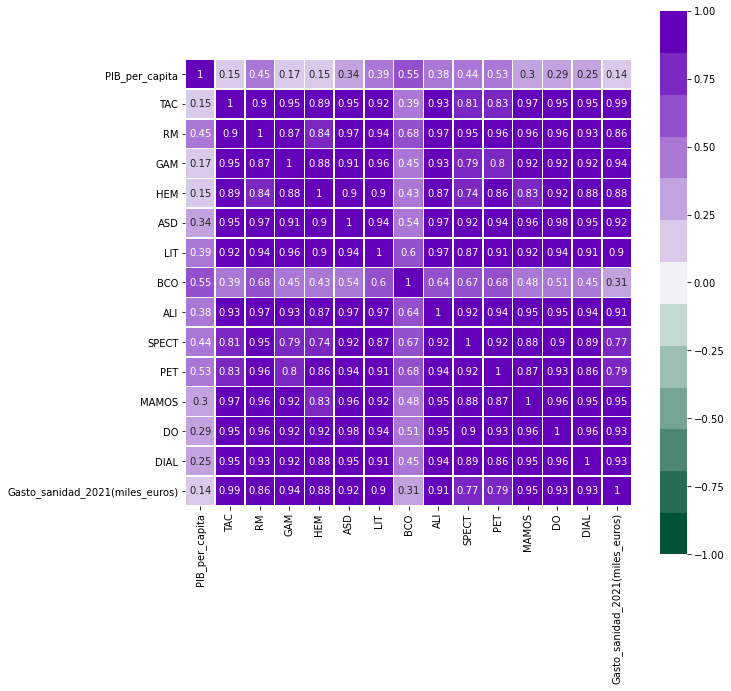

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pib = pd.read_csv('./data/pib_per_capita_ccaa.csv', sep=';')
pib.head()

prueba_3 = pib.merge(equipo_medico, on='Comunidad Autónoma')
prueba_3.head()

prueba_3 = prueba_3.merge(gasto_sanidad, on='Comunidad Autónoma')

plt.figure(figsize=(10,10))
sns.heatmap(prueba_3.corr(),
           vmin = -1,
           vmax = 1,
           annot = True,
           square = True,
           linewidth = .5,
           cmap=sns.diverging_palette(150, 277, s=100, l=30, n=13));

In [25]:
df = poblacion_ccaa

latlng = []
lat = []
lng = []
pop = []

for i in range(len(df['Población'])):
    data = geocoder.osm(df['Comunidad Autónoma'][i])
    latlng.append([data.lat, data.lng])

for coordenadas in latlng:
    lat.append(coordenadas[0])
    lng.append(coordenadas[1])

df['lat'] = lat
df['lon'] = lng

for j in range(len(df['Población'])):
    pop.append(df['Población'][j])

map_data = []

for k in range(len(pop)):
    map_data.append([lat[k], lng[k], pop[k]/1000])
    
heatmap = folium.Map([40, -2.5], tiles='CartoDB Dark_Matter' ,zoom_start=5)

plugins.HeatMap(data = map_data, radius=40).add_to(heatmap)

heatmap